# Flipkart best Laptops

#### Importing important libraries

In [1]:
from bs4 import BeautifulSoup as Soup
from matplotlib import pyplot as plt
import pandas as pd
import requests
import re

#### Define The URL of the Website you want to Scrape

In [2]:
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
print(url)

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off


#### Send The Get request to the Website

In [3]:
result = requests.get(url)
print(result)

<Response [200]>


#### Parse the HTML content of the Website

In [4]:
# Use Beautiful Soup to parse and extract information
content = result.text
soup1 = Soup(content, 'html.parser')

#### Find all the webpage and add the content.

In [5]:
pages_link = soup1.find_all('a',class_='ge-49M')
domain = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="

for i in range(2,41):
    link = domain+str(i)
    page_data = requests.get(link)
    content1 = page_data.text
    content += content1
    

In [6]:
# Parse the HTML content of all webpages
soupdata = Soup(content, 'html.parser')
type(soupdata)

bs4.BeautifulSoup

In [7]:
# Getting all laptops details and storing it in containers
containers = soupdata.find_all('div', class_='_2kHMtA')
print(type(containers), len(containers))

<class 'bs4.element.ResultSet'> 960


In [8]:
# Create CSV file(s) with the extracted information

f = open('laptops_info.csv','wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage\n'.encode())


# Loop through each product

for container in containers:
    #Finding Product Name
    product = container.find('div', class_='_4rR01T')
    ProductName= product.text.split('-')[0].strip()
    
    # Finding Stars
    star = container.find('div', class_='_3LWZlK')
    try:
        Stars = star.text
    except:
        Stars = 0
    
    # Finding Ratings & Reviews
    Rating = container.find('span', class_='_2_R_DZ')
    try:
        ratRev = re.findall('\d+,?\d*', Rating.text)
        Ratings = ratRev[0].replace(',','')
        Reviews = ratRev[1].replace(',','')
    except:
        Ratings = 0
        Reviews = 0
    
    #Finding Current Price
    CurrentPrice = container.find('div', class_='_30jeq3 _1_WHN1').text.replace(',','').replace('₹','')
    
    #Find MRP
    mrp = container.find('div',class_='_3I9_wc _27UcVY')
    try:
        MRP = mrp.text.replace(',','').replace('₹','')
    except:
        MRP = 0
        
    #Finding Information about the product
    info = container.findAll('li',class_='rgWa7D')
    Processor = info[0].text
    Ram = info[1].text
    Storage = info[3].text

    #print(ProductName, Stars, Ratings, Reviews, CurrentPrice, MRP, Processor, Ram, Storage)
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{Ram},{Storage}\n".encode())
    #print('\n')

f.close()


In [9]:
# Verify the information in the CSV files by reading them back using Pandas.
data = pd.read_csv("laptops_info.csv",on_bad_lines='skip')
data

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen,4.2,159,15,34490,48490,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen,4.2,4231,409,38700,59390,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9459,946,33990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
3,acer Aspire 3 Ryzen 3 Dual Core 3250U,4.2,183,46,26990,42999,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD
4,HP Celeron Dual Core,4.4,7,1,25990,36965,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD
...,...,...,...,...,...,...,...,...,...
922,ASUS Chromebook Celeron Dual Core,3.6,378,50,19990,22990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 Inch) Display
923,Lenovo Core i7 11th Gen,0.0,0,0,92500,115900,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD
924,ASUS ASUS TUF Gaming A15 Ryzen 7 Octa Core 6800HS,0.0,0,0,175990,0,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,1 TB SSD
925,HP Intel Core i5 10th Gen,5.0,2,1,127000,152042,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD


In [10]:
# Shape of data
data.shape

(927, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   927 non-null    object 
 1   Stars         927 non-null    float64
 2   Ratings       927 non-null    int64  
 3   Reviews       927 non-null    int64  
 4   CurrentPrice  927 non-null    int64  
 5   MRP           927 non-null    int64  
 6   Processor     927 non-null    object 
 7   Ram           927 non-null    object 
 8   Storage       927 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 65.3+ KB


In [12]:
# Removing Duplicate data
df = data.drop_duplicates(['Stars','Ratings','Reviews','CurrentPrice','MRP'])
df.shape

(619, 9)

### Find the Product having highest Reviews

In [13]:
df[df['Reviews']==max(df['Reviews'])]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
553,APPLE MacBook Air Core i5 5th Gen,4.7,30953,3303,74490,84900,Intel Core i5 Processor (5th Gen),8 GB DDR3 RAM,128 GB SSD


In [14]:
top_5 = data.sort_values(by='Reviews', ascending = False).head()

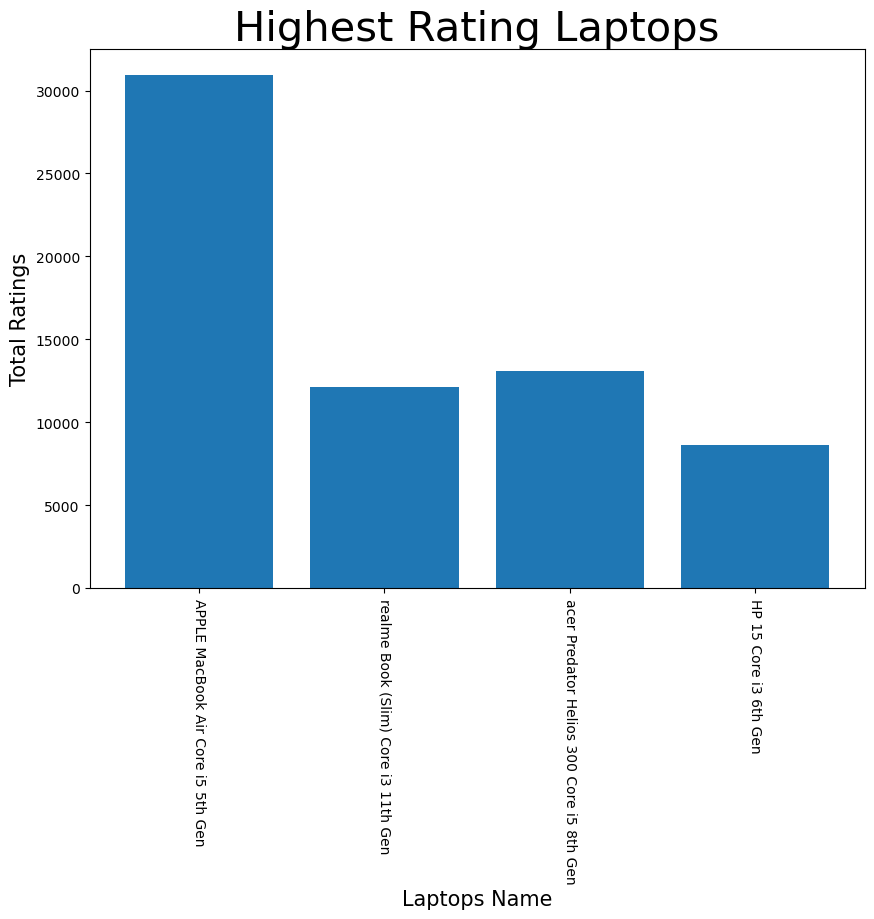

In [15]:
plt.figure(figsize=(10,7))
plt.bar(x=top_5['ProductName'], height = top_5['Ratings'])
plt.title('Highest Rating Laptops', fontsize=30)
plt.xlabel('Laptops Name', fontsize=15)
plt.ylabel('Total Ratings', fontsize=15)
plt.xticks(rotation = 270)

plt.show()

### Find the Product Having highest Stars

In [16]:
df.sort_values(by='Stars', ascending = False).head(5)

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
575,DELL Core i5 12th Gen,5.0,4,0,79890,99498,Intel Core i5 Processor (12th Gen),16 GB DDR5 RAM,512 GB SSD
283,acer Predator Helios 300 Core i7 12th Gen,5.0,4,0,156490,179999,Intel Core i7 Processor (12th Gen),16 GB DDR5 RAM,1 TB SSD
515,acer Aspire 5 Ryzen 7 Octa Core 5700U,5.0,3,0,59990,79999,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,512 GB SSD
91,ASUS ZenBook Duo 14 (2021) Touch Panel Core i5...,5.0,3,0,79990,140990,Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,512 GB SSD
612,Lenovo Core i3 10th Gen,5.0,1,1,37890,48900,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,256 GB SSD


### Most Affordable Laptops

In [17]:
Lowest_price = df.sort_values(by='CurrentPrice', ascending = True).head(10)
Lowest_price

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
328,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,1653,258,15990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display
312,ASUS Chromebook Celeron Dual Core,3.7,1455,197,17990,25990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,39.62 cm (15.6 inch) Display
256,Lenovo IdeaPad 3 CB Celeron Dual Core,0.0,0,0,19729,34890,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,35.56 cm (14 Inch) Display
178,Lenovo Celeron Dual Core,3.9,121,8,19990,36000,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,256 GB HDD|256 GB SSD
727,ASUS EeeBook 12 Celeron Dual Core,4.0,14,0,19990,27990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,29.46 cm (11.6 Inch) Display
922,ASUS Chromebook Celeron Dual Core,3.6,378,50,19990,22990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 Inch) Display
109,Infinix INBook X1 Neo Series Celeron Quad Core,4.2,637,110,20990,29990,Intel Celeron Quad Core Processor,4 GB LPDDR4X RAM,128 GB SSD
735,ASUS EeeBook 12 Celeron Dual Core,4.2,13,0,21990,27990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,29.46 cm (11.6 Inch) Display
790,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,1653,258,22990,29990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display
379,acer Extensa Pentium Quad Core,4.6,5,1,23000,34990,Intel Pentium Quad Core Processor,4 GB DDR4 RAM,256 GB SSD


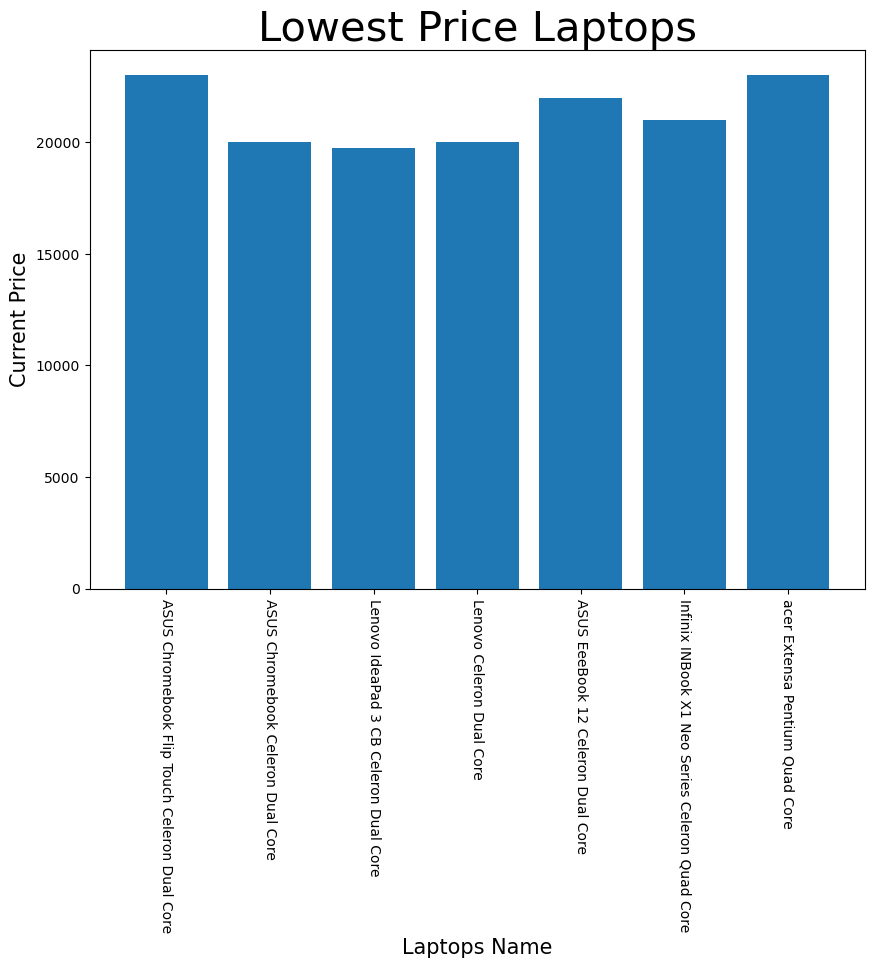

In [18]:
plt.figure(figsize=(10,7))
plt.bar(x=Lowest_price['ProductName'], height = Lowest_price['CurrentPrice'])
plt.title('Lowest Price Laptops', fontsize=30)
plt.xlabel('Laptops Name', fontsize=15)
plt.ylabel('Current Price', fontsize=15)
plt.xticks(rotation = 270)

plt.show()